# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

In [58]:
# Calculate the number of passengers traveling to Heliopolis irrespective of trip origin between the years 2019 and 2021. Create a graph demonstrating the year of year change in passengers.

In [61]:
import pandas as pd
cairo_metro = pd.read_csv("metro_od.csv", dtypes={'date': pd.datetime64})

AttributeError: module 'pandas' has no attribute 'datetime64'

In [62]:
cairo_metro['date'] = pd.to_datetime(cairo_metro['date'])

In [63]:
cairo_metro.dtypes

origin                 object
destination            object
date           datetime64[ns]
passengers              int64
year                    int64
dtype: object

In [64]:
grouped_data = cairo_metro.groupby('destination')['passengers'].sum().reset_index()
grouped_data

,destination,passengers
0,Abbassiya,2345315
1,Abdou Pasha,1404470
2,Adly Mansour,676164
3,Ain Helwan,1356763
4,Ain Shams,6612129
...,...,...
66,St. Teresa,1894614
67,Stadium,1153912
68,Tora El-Asmant,183181
69,Tora El-Balad,1566047


In [65]:
grouped_data.loc[grouped_data['destination'] == 'Heliopolis']

,destination,passengers
33,Heliopolis,730536


In [66]:
cairo_metro.head()

,origin,destination,date,passengers,year
0,Abbassiya,Abbassiya,2019-12-01,194,2019
1,Abbassiya,Abbassiya,2019-12-03,149,2019
2,Abbassiya,Abbassiya,2019-12-04,143,2019
3,Abbassiya,Abbassiya,2019-12-07,102,2019
4,Abbassiya,Abbassiya,2019-12-08,151,2019


In [67]:
cairo_metro[['month', 'day', 'year']] = cairo_metro['date'].str.split('/', expand=True)

AttributeError: Can only use .str accessor with string values!

In [68]:
cairo_metro.head()

,origin,destination,date,passengers,year
0,Abbassiya,Abbassiya,2019-12-01,194,2019
1,Abbassiya,Abbassiya,2019-12-03,149,2019
2,Abbassiya,Abbassiya,2019-12-04,143,2019
3,Abbassiya,Abbassiya,2019-12-07,102,2019
4,Abbassiya,Abbassiya,2019-12-08,151,2019


In [69]:
cairo_metro['year'] = cairo_metro['date'].dt.year

In [70]:
heliopolis_trips = cairo_metro[cairo_metro['destination'] == 'Heliopolis']

In [71]:
heliopolis_trips_by_year = heliopolis_trips.groupby(['destination', 'year']).size()

In [72]:
trips_2019 = heliopolis_trips_by_year.get(('Heliopolis', 2019), 0)
trips_2020 = heliopolis_trips_by_year.get(('Heliopolis', 2020), 0)
trips_2021 = heliopolis_trips_by_year.get(('Heliopolis', 2021), 0)

print("Number of trips to Heliopolis in 2019:", trips_2019)
print("Number of trips to Heliopolis in 2020:", trips_2020)
print("Number of trips to Heliopolis in 2021:", trips_2021)

Number of trips to Heliopolis in 2019: 2076
Number of trips to Heliopolis in 2020: 13171
Number of trips to Heliopolis in 2021: 28


In [73]:
pivot_table = pd.pivot_table(cairo_metro, values='passengers', index='destination', columns='date', aggfunc='sum', fill_value=0)
print(pivot_table)

date            2019-10-01  2019-10-02  2019-10-03  2019-10-04  2019-10-05  \
destination                                                                  
Abbassiya             1006         978         967         217         703   
Abdou Pasha           1019         989         943         218         645   
Adly Mansour             0           0           0           0           0   
Ain Helwan            4356        4409        4478        2279        2670   
Ain Shams            19059       19344       20309       13238       17297   
...                    ...         ...         ...         ...         ...   
St. Teresa            2217        2169        2319        1596        2002   
Stadium                372         420         436         133         247   
Tora El-Asmant         705         697         740         299         443   
Tora El-Balad         4683        4563        5198        2763        4238   
Wadi Hof              3515        3539        3546        1395  

In [74]:
summary_stats = cairo_metro.groupby('destination')['passengers'].agg(['mean', 'sum', 'count'])
print(summary_stats)

                      mean      sum  count
destination                               
Abbassiya       146.171081  2345315  16045
Abdou Pasha      87.533188  1404470  16045
Adly Mansour    117.614194   676164   5749
Ain Helwan       84.559863  1356763  16045
Ain Shams       417.748863  6612129  15828
...                    ...      ...    ...
St. Teresa      121.332949  1894614  15615
Stadium          73.897663  1153912  15615
Tora El-Asmant   12.148892   183181  15078
Tora El-Balad   101.618779  1566047  15411
Wadi Hof         56.473583   881835  15615

[71 rows x 3 columns]


In [75]:
numerical_stats = cairo_metro.describe()
print(numerical_stats)

         passengers          year
count  1.048575e+06  1.048575e+06
mean   2.710648e+02  2.019852e+03
std    5.281328e+02  3.603086e-01
min    0.000000e+00  2.019000e+03
25%    2.000000e+01  2.020000e+03
50%    8.600000e+01  2.020000e+03
75%    2.790000e+02  2.020000e+03
max    1.056600e+04  2.021000e+03


In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

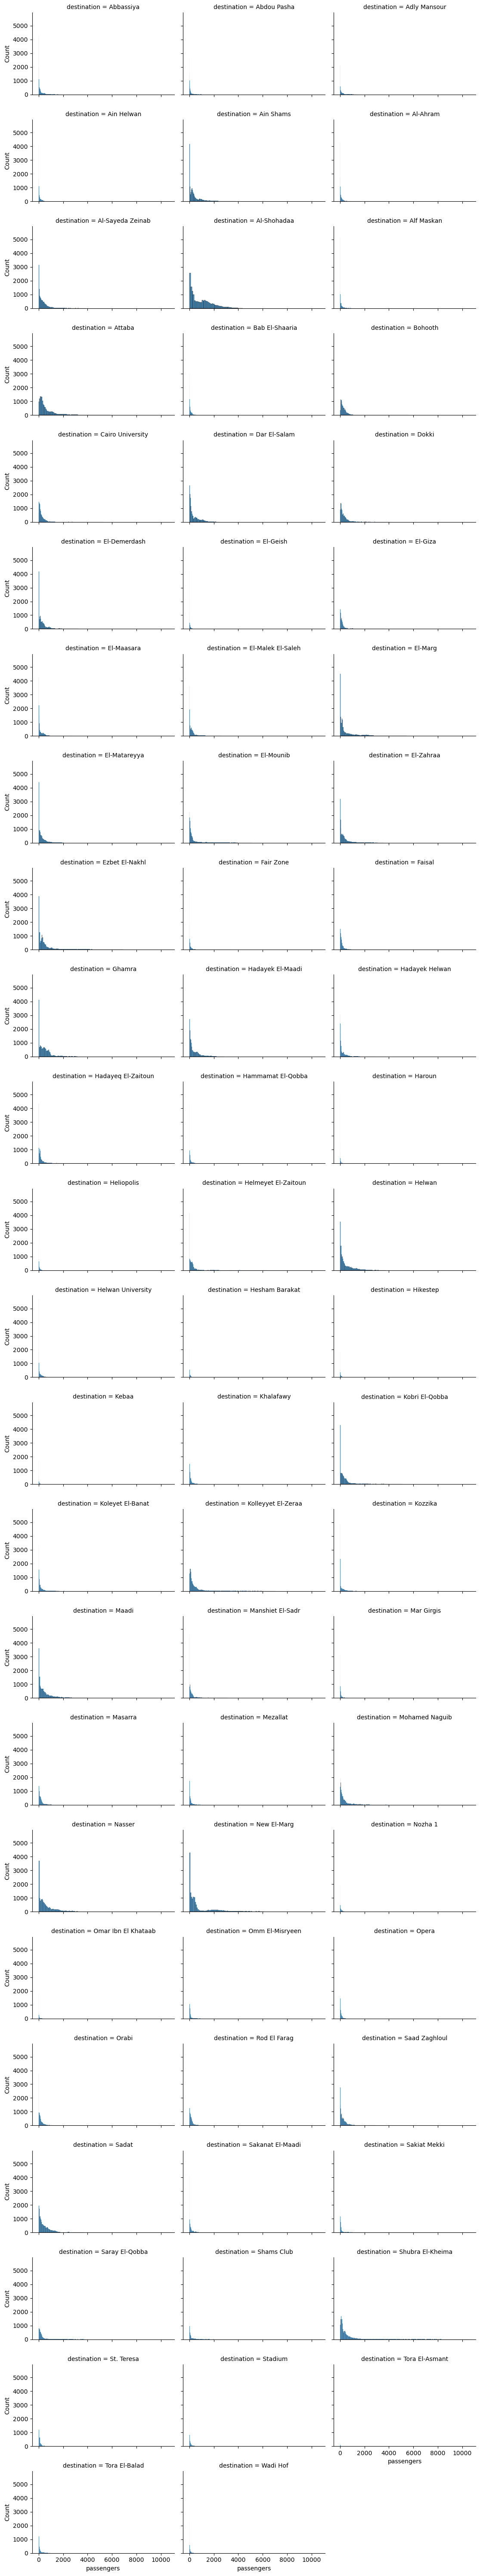

In [77]:
g = sns.FacetGrid(cairo_metro, col="destination", col_wrap=3, height=2.5, aspect=1.5)
g.map(sns.histplot, "passengers")

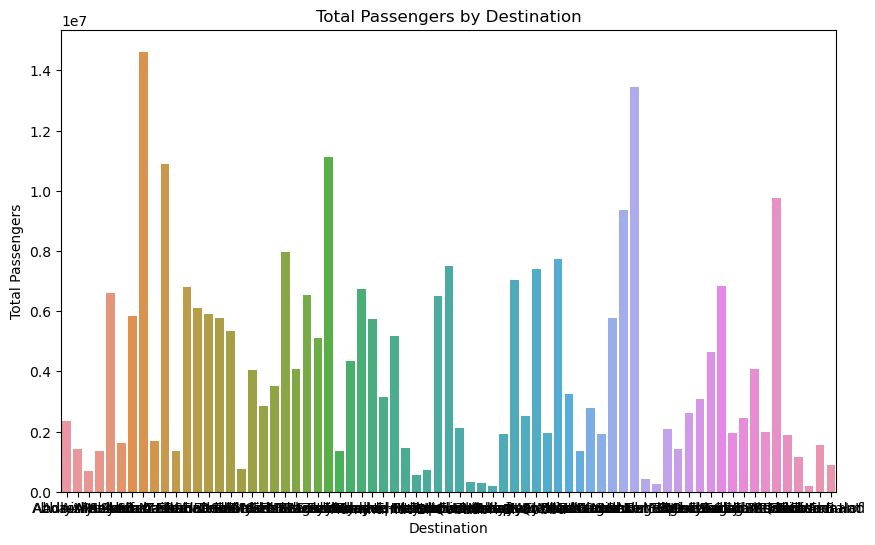

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='passengers', data=cairo_metro, estimator=sum, ci=None)
plt.title('Total Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Total Passengers')
plt.show()

In [81]:
heliopolis_data = cairo_metro[cairo_metro['destination'] == 'Heliopolis']
heliopolis_data

,origin,destination,date,passengers,year
11698,Abbassiya,Heliopolis,2019-12-01,375,2019
11699,Abbassiya,Heliopolis,2019-12-03,388,2019
11700,Abbassiya,Heliopolis,2019-12-04,390,2019
11701,Abbassiya,Heliopolis,2019-12-07,264,2019
11702,Abbassiya,Heliopolis,2019-12-08,369,2019
...,...,...,...,...,...
1033400,Khalafawy,Heliopolis,2020-12-28,10,2020
1033401,Khalafawy,Heliopolis,2020-12-29,14,2020
1033402,Khalafawy,Heliopolis,2020-12-30,11,2020
1033403,Khalafawy,Heliopolis,2020-12-31,14,2020


In [82]:
heliopolis_data.head()

,origin,destination,date,passengers,year
11698,Abbassiya,Heliopolis,2019-12-01,375,2019
11699,Abbassiya,Heliopolis,2019-12-03,388,2019
11700,Abbassiya,Heliopolis,2019-12-04,390,2019
11701,Abbassiya,Heliopolis,2019-12-07,264,2019
11702,Abbassiya,Heliopolis,2019-12-08,369,2019


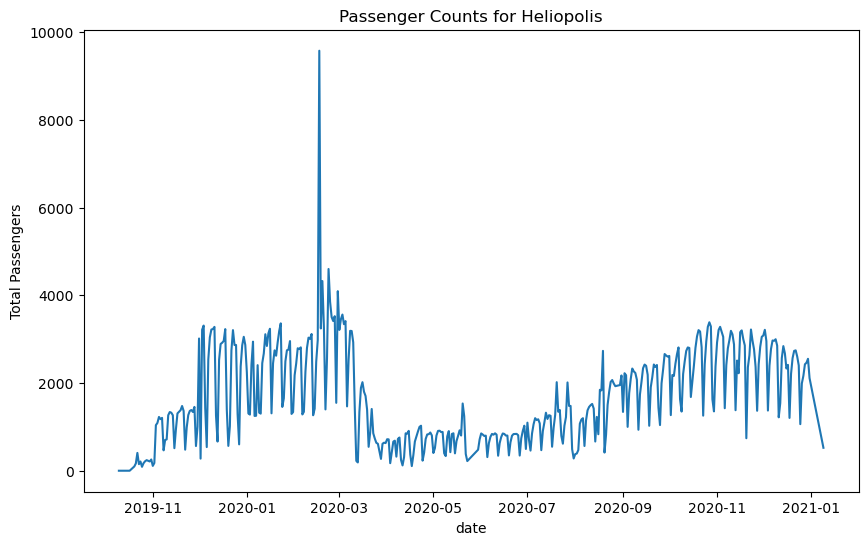

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='passengers', data=heliopolis_data, estimator=sum, ci=None)
plt.title('Passenger Counts for Heliopolis')
plt.xlabel('date')
plt.ylabel('Total Passengers')
plt.show()

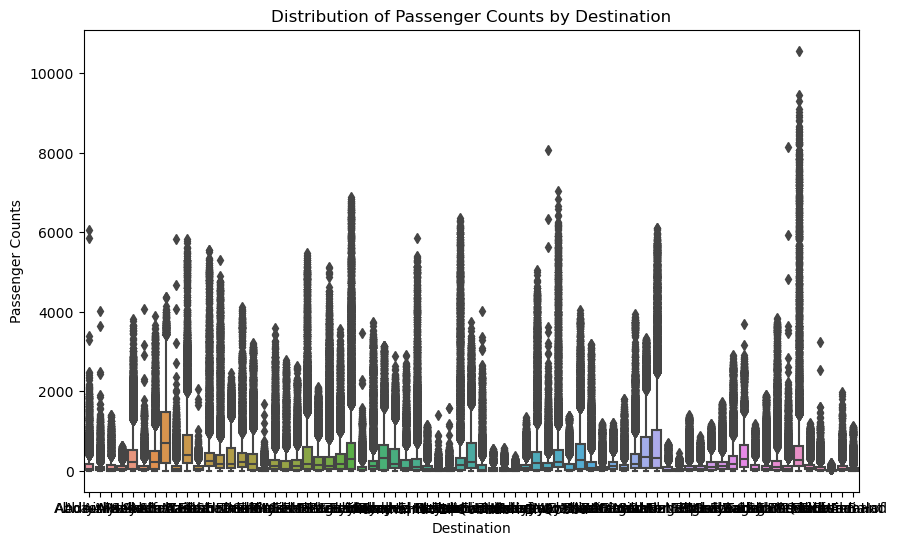

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='destination', y='passengers', data=cairo_metro)
plt.title('Distribution of Passenger Counts by Destination')
plt.xlabel('Destination')
plt.ylabel('Passenger Counts')
plt.show()

In [ ]:
# Using cairo_metro as my dataframe and filtered my data for Heliopolis to determine the total number of passengers traveling to Heliopolis irrespective of travel origin. I wanted to extract the year from the data column to analyze the year over year change, so I sliced the date column and made three new columns separating month, day, and year. Group by both destination and year and count the number of trips. Then I created a pivot table, bar chart, line plot, and box plot, to summarize passenger counts by destination and year. The end. 


In [ ]:
# I intend to use this data to assess passenger trip data for the neighborhood of Heliopolis is Cairo, Egypt. I am doing this as part of my research for my capstone project, which focuses on this particular neighborhood because in recent years public transit connectivity in the area has been replaced by highway construction to connect Cairo to the New Capital City 40 km east of the city. I intend to look at data from the 3 months preceding the COVID-19 pandemic (Dec 2019, Jan 2020, and Feb 2020), filtering out Saturday/Sunday. For each origin destination, I would like to gather the number of days that have counts. I also need the total sum of ridership for those dates that have data. Following this analysis, I would then divide the sum of the number of days to determine the average. I will compare the data for Heliopolis to the transit stops in old/downtown Cairo which I anticipate will have higher ridership data. 